In [1]:
import random
import numpy as np
import json
from tqdm import tqdm
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist, squareform
from scipy.optimize import linear_sum_assignment
from collections import Counter
import time
import os
import pandas as pd
from scipy.signal import correlate
np. set_printoptions(threshold=np. inf)

In [2]:
# Permanently changes the pandas settings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [7]:
date = 'Oct6th-reduced2-'
filename = ''.join((date,'scan_stats.json'))
filename

'Oct6th-reduced2-scan_stats.json'

In [8]:
import scan
import simulate_data

In [9]:
default_params = {
    'M':1,
    'N':100,
    'D':71,
    'T':1000,
    'seed':0,
    'SM_repetitions':5,
    'spikes_in_SM':20,
    'noise':500
}
scan_dict = {
    'noise':[0,100,200,300,400]
}


In [10]:
param_combinations = []
for param_name, param_values in scan_dict.items():
    for param_value in param_values:
        params = default_params.copy()
        params[param_name] = param_value
        param_combinations.append(params)
len(param_combinations)

5

In [12]:
import numpy as np
import random
import os
import pandas as pd
import json
from tqdm import tqdm

# Define default parameters and scan values
default_params = {
    'M':1,
    'N':100,
    'D':71,
    'T':1000,
    'seed':0,
    'SM_repetitions':5,
    'spikes_in_SM':20,
    'noise':500
}
scan_dict = {
    'noise':[0,100,200,300,400]
}


# Generate all parameter combinations
param_combinations = []
for param_name, param_values in scan_dict.items():
    for param_value in param_values:
        params = default_params.copy()
        params[param_name] = param_value
        param_combinations.append(params)

num_samples = len(param_combinations)
trials = 5
results = []

# Iterate through parameter combinations
for idx, params in tqdm(enumerate(param_combinations)):
    for trial in range(trials):

        if os.path.isfile(filename):
            df = pd.read_json(filename)
            with open(filename, 'r') as results_file:
                results = json.load(results_file)
        params['seed'] = (trial+1)*(idx+1)
        print(params)
        A_dense, A_sparse, B_dense, B_sparse, K_dense, K_sparse = simulate_data.generate_synthetic_data(params)
        start = time.time()
        pattern_template, sublist_keys_filt, window_time, cluster_time, sequence_time = scan.scan_raster(A_sparse[1], A_sparse[0], window_dim=params['D'])
        if len(pattern_template) != 0:
            SM_acc, cc, _ = simulate_data.check_ground_truth(pattern_template, K_dense)
        else:
            SM_acc, cc = np.zeros(K_dense.shape[2]), []
        end = time.time()
        result = {
            'M':params['M'],
            'N':params['N'],
            'D':params['D'],
            'T':params['T'],
            'SM_repetitions':params['SM_repetitions'],
            'spikes_in_SM':params['spikes_in_SM'],
            'noise':params['noise'],
            'window_time': window_time,
            'cluster_time': cluster_time,
            'sequence_time': sequence_time,
            'total_time': end-start,
            'total_spikes':len(A_sparse[1]),
            'total_patterns':len(pattern_template),
            'SM_acc':SM_acc.tolist()
        }

        results.append(result)

        with open(filename, 'w') as results_file:
            json.dump(results, results_file, indent=4)


0it [00:00, ?it/s]

{'M': 1, 'N': 100, 'D': 71, 'T': 1000, 'seed': 1, 'SM_repetitions': 5, 'spikes_in_SM': 20, 'noise': 0}
100 Windows
3 patterns found...s... 67% 10.01 | opt_cutoff - 0.2 | most_detections - 4etections - 4432
{'M': 1, 'N': 100, 'D': 71, 'T': 1000, 'seed': 2, 'SM_repetitions': 5, 'spikes_in_SM': 20, 'noise': 0}
100 Windows
4 patterns found...s... 75% 10.01 | opt_cutoff - 0.67 | most_detections - 4etections - 4
{'M': 1, 'N': 100, 'D': 71, 'T': 1000, 'seed': 3, 'SM_repetitions': 5, 'spikes_in_SM': 20, 'noise': 0}
100 Windows
3 patterns found...s... 67% 10.01 | opt_cutoff - 0.83 | most_detections - 4etections - 421
{'M': 1, 'N': 100, 'D': 71, 'T': 1000, 'seed': 4, 'SM_repetitions': 5, 'spikes_in_SM': 20, 'noise': 0}
100 Windows
2 patterns found...s... 50% 10.01 | opt_cutoff - 0.47000000000000003 | most_detections - 4etections - 44
{'M': 1, 'N': 100, 'D': 71, 'T': 1000, 'seed': 5, 'SM_repetitions': 5, 'spikes_in_SM': 20, 'noise': 0}
100 Windows
2 patterns found...s... 50% 10.01 | opt_cutoff - 

1it [00:03,  3.16s/it]

{'M': 1, 'N': 100, 'D': 71, 'T': 1000, 'seed': 2, 'SM_repetitions': 5, 'spikes_in_SM': 20, 'noise': 100}
200 Windows
3 patterns found...s... 67% 10.01 | opt_cutoff - 0.83 | most_detections - 4etections - 4
{'M': 1, 'N': 100, 'D': 71, 'T': 1000, 'seed': 4, 'SM_repetitions': 5, 'spikes_in_SM': 20, 'noise': 100}
200 Windows
4 patterns found...s... 75% 10.01 | opt_cutoff - 0.78 | most_detections - 4etections - 4
{'M': 1, 'N': 100, 'D': 71, 'T': 1000, 'seed': 6, 'SM_repetitions': 5, 'spikes_in_SM': 20, 'noise': 100}
200 Windows
4 patterns found...s... 75% 10.01 | opt_cutoff - 0.78 | most_detections - 4etections - 41_detections - 1
{'M': 1, 'N': 100, 'D': 71, 'T': 1000, 'seed': 8, 'SM_repetitions': 5, 'spikes_in_SM': 20, 'noise': 100}
200 Windows
1 patterns found...s... 0%- 10.01 | opt_cutoff - 1.09 | most_detections - 4etections - 4
{'M': 1, 'N': 100, 'D': 71, 'T': 1000, 'seed': 10, 'SM_repetitions': 5, 'spikes_in_SM': 20, 'noise': 100}
198 Windows


2it [00:10,  5.81s/it]

5 patterns found...s... 80% 10.01 | opt_cutoff - 0.78 | most_detections - 4
{'M': 1, 'N': 100, 'D': 71, 'T': 1000, 'seed': 3, 'SM_repetitions': 5, 'spikes_in_SM': 20, 'noise': 200}
300 Windows
1 patterns found...s... 0%- 10.01 | opt_cutoff - 1.09 | most_detections - 4etections - 4
{'M': 1, 'N': 100, 'D': 71, 'T': 1000, 'seed': 6, 'SM_repetitions': 5, 'spikes_in_SM': 20, 'noise': 200}
300 Windows
1 patterns found...s... 0%- 10.01 | opt_cutoff - 1.09 | most_detections - 4etections - 4
{'M': 1, 'N': 100, 'D': 71, 'T': 1000, 'seed': 9, 'SM_repetitions': 5, 'spikes_in_SM': 20, 'noise': 200}
300 Windows
1 patterns found...s... 0%- 10.01 | opt_cutoff - 1.09 | most_detections - 4etections - 4
{'M': 1, 'N': 100, 'D': 71, 'T': 1000, 'seed': 12, 'SM_repetitions': 5, 'spikes_in_SM': 20, 'noise': 200}
300 Windows
1 patterns found...s... 0%- 10.01 | opt_cutoff - 1.09 | most_detections - 4etections - 4
{'M': 1, 'N': 100, 'D': 71, 'T': 1000, 'seed': 15, 'SM_repetitions': 5, 'spikes_in_SM': 20, 'noise'

3it [00:22,  8.64s/it]

{'M': 1, 'N': 100, 'D': 71, 'T': 1000, 'seed': 4, 'SM_repetitions': 5, 'spikes_in_SM': 20, 'noise': 300}
400 Windows


2 patterns found...s... 50% 10.01 | opt_cutoff - 1.09 | most_detections - 4etections - 4
{'M': 1, 'N': 100, 'D': 71, 'T': 1000, 'seed': 8, 'SM_repetitions': 5, 'spikes_in_SM': 20, 'noise': 300}
400 Windows
2 patterns found...s... 50% 10.01 | opt_cutoff - 1.09 | most_detections - 4etections - 4
{'M': 1, 'N': 100, 'D': 71, 'T': 1000, 'seed': 12, 'SM_repetitions': 5, 'spikes_in_SM': 20, 'noise': 300}
400 Windows
1 patterns found...s... 0%- 10.01 | opt_cutoff - 1.09 | most_detections - 4etections - 4
{'M': 1, 'N': 100, 'D': 71, 'T': 1000, 'seed': 16, 'SM_repetitions': 5, 'spikes_in_SM': 20, 'noise': 300}
399 Windows
2 patterns found...s... 50% 10.01 | opt_cutoff - 1.09 | most_detections - 4etections - 4
{'M': 1, 'N': 100, 'D': 71, 'T': 1000, 'seed': 20, 'SM_repetitions': 5, 'spikes_in_SM': 20, 'noise': 300}
400 Windows
4 patterns found...s... 75% 10.01 | opt_cutoff - 1.09 | most_detections - 4etections - 4


4it [00:38, 11.55s/it]

{'M': 1, 'N': 100, 'D': 71, 'T': 1000, 'seed': 5, 'SM_repetitions': 5, 'spikes_in_SM': 20, 'noise': 400}
500 Windows


1 patterns found...s... 0%- 10.01 | opt_cutoff - 1.09 | most_detections - 4etections - 4
{'M': 1, 'N': 100, 'D': 71, 'T': 1000, 'seed': 10, 'SM_repetitions': 5, 'spikes_in_SM': 20, 'noise': 400}
498 Windows
19 patterns found...... 95% 10.01 | opt_cutoff - 1.37 | most_detections - 4etections - 4
{'M': 1, 'N': 100, 'D': 71, 'T': 1000, 'seed': 15, 'SM_repetitions': 5, 'spikes_in_SM': 20, 'noise': 400}
499 Windows
1 patterns found...s... 0%- 10.01 | opt_cutoff - 1.09 | most_detections - 4etections - 4
{'M': 1, 'N': 100, 'D': 71, 'T': 1000, 'seed': 20, 'SM_repetitions': 5, 'spikes_in_SM': 20, 'noise': 400}
500 Windows
5 patterns found...s... 80% 10.01 | opt_cutoff - 1.09 | most_detections - 4etections - 4
{'M': 1, 'N': 100, 'D': 71, 'T': 1000, 'seed': 25, 'SM_repetitions': 5, 'spikes_in_SM': 20, 'noise': 400}
500 Windows
16 patterns found...... 94% 10.01 | opt_cutoff - 1.37 | most_detections - 4etections - 4


5it [00:57, 11.59s/it]


In [13]:
df = pd.DataFrame(results)
df

,M,N,D,T,SM_repetitions,spikes_in_SM,noise,window_time,cluster_time,sequence_time,total_time,total_spikes,total_patterns,SM_acc
0,1,100,71,1000,5,20,0,0.020475,0.470998,0.000998,0.506973,100,3,[1.0]
1,1,100,71,1000,5,20,0,0.015992,0.613951,0.000000,0.683990,100,4,[1.0]
2,1,100,71,1000,5,20,0,0.032102,0.679033,0.004183,0.740303,100,3,[1.0]
3,1,100,71,1000,5,20,0,0.030241,0.646690,0.000284,0.690286,100,2,[1.0]
4,1,100,71,1000,5,20,0,0.016148,0.321317,0.000000,0.357461,100,2,[1.0]
5,1,100,71,1000,5,20,100,0.054163,1.459676,0.000000,1.548453,200,3,[1.0]
6,1,100,71,1000,5,20,100,0.033271,1.500470,0.000000,1.575116,200,4,[1.0]
7,1,100,71,1000,5,20,100,0.033684,1.241581,0.000999,1.324972,200,4,[1.0]
8,1,100,71,1000,5,20,100,0.034736,1.311930,0.000000,1.360289,200,1,[1.0]
9,1,100,71,1000,5,20,100,0.039728,1.449425,0.002160,1.560227,200,5,[1.0]


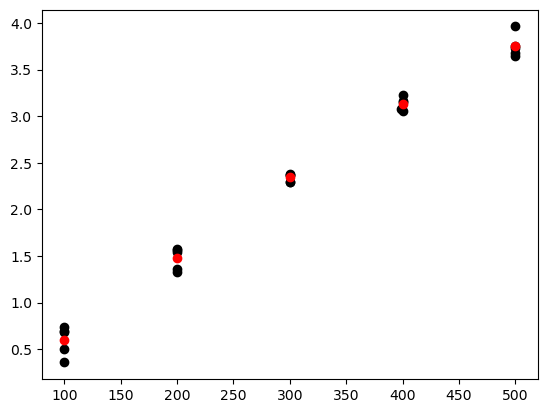

In [16]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(df['total_spikes'],df['total_time'],c='black')
plt.scatter(df.groupby(['noise'])['total_spikes'].mean().index.to_numpy()+100,df.groupby(['noise'])['total_time'].mean(),c='red')
plt.show()

In [22]:
df = pd.DataFrame(results)
df

,M,N,D,T,SM_repetitions,spikes_in_SM,noise,window_time,cluster_time,sequence_time,total_time,total_spikes,total_patterns,SM_acc
0,1,60,51,1000,2,8,500,0.054152,0.923665,0.001000,1.045798,516,25,[1.0]
1,1,60,51,1000,2,8,500,0.048465,0.943854,0.002990,1.090894,516,37,[1.0]
2,1,60,51,1000,2,8,500,0.049437,0.957768,0.003025,1.129365,516,30,[0.8]
3,1,60,51,1000,2,8,500,0.072622,0.919272,0.001981,1.068494,516,27,[1.0]
4,1,60,51,1000,2,8,500,0.049012,0.975976,0.001994,1.147711,516,28,[0.8888888888888888]
5,1,60,51,1000,3,8,500,0.058902,0.991894,0.002858,1.163107,524,33,[1.0]
6,1,60,51,1000,3,8,500,0.048864,1.136513,0.002042,1.257926,524,24,[1.0]
7,1,60,51,1000,3,8,500,0.049094,0.991745,0.002228,1.108932,524,23,[1.0]
8,1,60,51,1000,3,8,500,0.046844,0.969903,0.001997,1.095773,524,26,[1.0]
9,1,60,51,1000,3,8,500,0.046872,0.924265,0.001994,1.050510,524,28,[1.0]


In [8]:
df = pd.DataFrame(results)
df

,M,N,D,T,SM_repetitions,spikes_in_SM,noise,window_time,cluster_time,sequence_time,total_time,total_spikes,total_patterns,SM_acc
0,1,40,51,1000,2,16,500,0.151927,1.013533,0.000000,1.172442,532,1,[0.9411764705882353]
1,1,40,51,1000,2,16,500,0.075170,1.079818,0.000000,1.160965,532,1,[0.8888888888888888]
2,1,40,51,1000,2,16,500,0.078308,1.066246,0.002581,1.221224,531,23,[0.9411764705882353]
3,1,40,51,1000,2,16,500,0.074923,1.004865,0.005120,1.187864,532,24,[0.9411764705882353]
4,1,40,51,1000,2,16,500,0.080160,1.003878,0.003087,1.185989,532,29,[1.0]
5,1,40,51,1000,3,16,500,0.073096,1.163201,0.001091,1.245954,548,1,[1.0]
6,1,40,51,1000,3,16,500,0.116719,1.026147,0.000000,1.153871,548,2,[1.0]
7,1,40,51,1000,3,16,500,0.095131,1.059689,0.001988,1.170864,548,2,[1.0]
8,1,40,51,1000,3,16,500,0.087043,1.109948,0.000994,1.262777,548,14,[1.0]
9,1,40,51,1000,3,16,500,0.131773,1.211760,0.002991,1.422231,548,21,[1.0]


In [103]:
df = pd.DataFrame(results)
df

,M,N,D,T,SM_repetitions,spikes_in_SM,noise,window_time,cluster_time,sequence_time,total_time,total_spikes,total_patterns,SM_acc
0,1,40,51,1000,2,16,500,0.128728,1.241974,0.000995,1.388344,532,2,[0.0625]
1,1,40,51,1000,2,16,500,0.143226,1.217516,0.001000,1.369713,532,1,[0.0]
2,1,40,51,1000,2,16,500,0.111691,1.476068,0.001112,1.616807,531,4,[0.0625]
3,1,40,51,1000,2,16,500,0.150545,1.331989,0.001024,1.494314,532,1,[0.0]
4,1,40,51,1000,2,16,500,0.150150,1.373448,0.000000,1.543606,532,3,[0.0625]
5,1,40,51,1000,3,16,500,0.147065,1.398505,0.000000,1.564904,548,1,[1.0]
6,1,40,51,1000,3,16,500,0.166068,1.437152,0.000000,1.616934,548,1,[1.0]
7,1,40,51,1000,3,16,500,0.115620,1.259534,0.002126,1.387554,548,1,[0.0]
8,1,40,51,1000,3,16,500,0.118404,1.419929,0.001025,1.548951,548,1,[0.0]
9,1,40,51,1000,3,16,500,0.166161,1.206098,0.000000,1.393204,548,3,[0.0625]


In [79]:
df = pd.DataFrame(results)
df

,M,N,D,T,SM_repetitions,spikes_in_SM,noise,window_time,cluster_time,sequence_time,total_time,total_spikes,total_patterns,SM_acc
0,1,40,51,1000,2,16,500,0.142144,1.640320,0.000000,1.791992,532,1,[0.0]
1,1,40,51,1000,2,16,500,0.138981,1.549839,0.000000,1.708794,532,2,[0.0625]
2,1,40,51,1000,2,16,500,0.139568,1.534565,0.000000,1.684293,532,1,[0.0]
3,1,40,51,1000,2,16,500,0.166136,1.679682,0.001194,1.879057,531,4,[0.0625]
4,1,40,51,1000,2,16,500,0.151962,1.638391,0.000000,1.802796,532,1,[0.0]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1,40,51,1000,8,16,2000,3.566416,4.918055,0.005527,9.426994,2128,1,[1.0]
76,1,40,51,1000,8,16,2000,3.249515,4.458474,0.005228,8.872928,2128,2,[1.0]
77,1,40,51,1000,8,16,2000,3.570205,4.461251,0.001032,9.012263,2128,2,[1.0]
78,1,40,51,1000,8,16,2000,3.167475,4.497282,0.003084,9.147531,2127,8,[1.0]


In [22]:
df = pd.DataFrame(results)
df

,M,N,D,T,SM_repetitions,spikes_in_SM,noise,window_time,cluster_time,sequence_time,total_time,total_spikes,total_patterns,SM_acc
0,1,40,51,1000,2,16,500,0.142144,1.640320,0.000000,1.791992,532,1,[0.0]
1,1,40,51,1000,2,16,500,0.138981,1.549839,0.000000,1.708794,532,2,[0.0625]
2,1,40,51,1000,2,16,500,0.139568,1.534565,0.000000,1.684293,532,1,[0.0]
3,1,40,51,1000,2,16,500,0.166136,1.679682,0.001194,1.879057,531,4,[0.0625]
4,1,40,51,1000,2,16,500,0.151962,1.638391,0.000000,1.802796,532,1,[0.0]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,1,40,51,1000,8,16,1000,0.837371,2.464127,0.000000,3.569124,1128,1,[1.0]
71,1,40,51,1000,8,16,1000,0.692686,2.455721,0.002598,3.836208,1128,5,[1.0]
72,1,40,51,1000,8,16,1000,0.691935,2.467754,0.005155,3.625958,1128,2,[1.0]
73,1,40,51,1000,8,16,1000,0.678112,2.599872,0.000000,3.857486,1127,5,[1.0]


In [40]:
len(acc) 

75

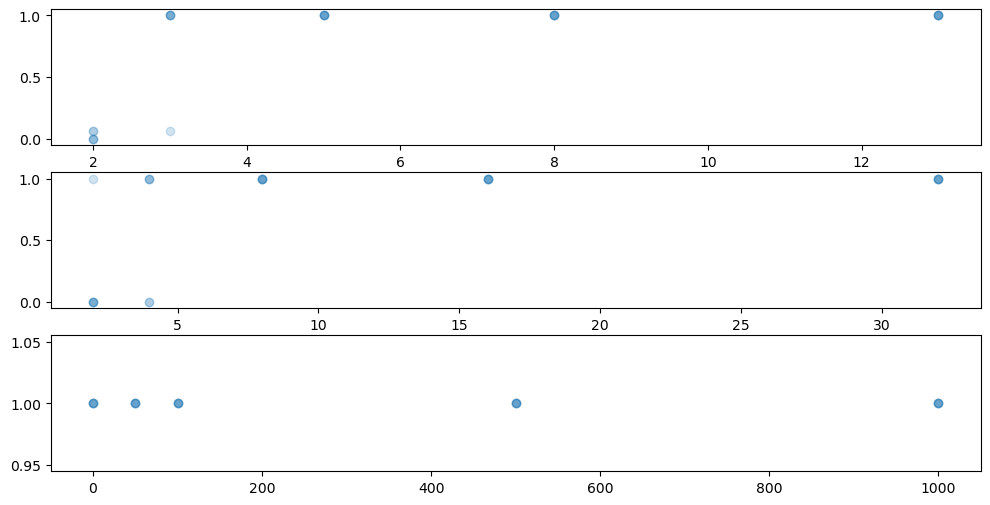

In [47]:
import matplotlib.pyplot as plt
slice_=slice(0*trials,5*trials)
fig, ax = plt.subplots(3,figsize=(12,6))
acc = [np.mean(k) for k in df['SM_acc']]
ax[0].scatter(df['SM_repetitions'].iloc[slice_].to_numpy(),acc[slice_],alpha=0.2)
slice_=slice(5*trials,10*trials)
ax[1].scatter(df['spikes_in_SM'].iloc[slice_].to_numpy(),acc[slice_],alpha=0.2)
slice_=slice(10*trials,15*trials)
ax[2].scatter(df['noise'].iloc[slice_].to_numpy(),acc[slice_],alpha=0.2)
plt.show()

,M,N,D,T,SM_repetitions,spikes_in_SM,noise,window_time,cluster_time,sequence_time,total_time,total_spikes,total_patterns,SM_acc
0,1,40,51,1000,2,16,500,0.144714,1.679871,0.000000,1.836644,532,1,[0.0]
1,1,40,51,1000,3,16,500,0.141501,1.597739,0.000000,1.759252,548,2,[0.0625]
2,1,40,51,1000,5,16,500,0.165485,1.699959,0.000000,1.940752,580,3,[1.0]
3,1,40,51,1000,8,16,500,0.190765,1.724007,0.000000,2.000737,628,1,[1.0]
4,1,40,51,1000,13,16,500,0.262969,1.879592,0.000000,2.403972,708,1,[1.0]
5,1,40,51,1000,8,2,500,0.124945,1.502964,0.000000,1.640147,516,1,[1.0]
6,1,40,51,1000,8,4,500,0.190682,1.531262,0.000000,1.741009,532,3,[0.0]
7,1,40,51,1000,8,8,500,0.157231,1.627533,0.000000,1.852448,564,1,[1.0]
8,1,40,51,1000,8,16,500,0.208568,1.870370,0.001047,2.167459,628,1,[1.0]
9,1,40,51,1000,8,32,500,0.320398,2.049592,0.000997,2.750216,756,7,[1.0]


In [11]:
df = pd.DataFrame(results)
df

,M,N,D,T,SM_repetitions,spikes_in_SM,noise,window_time,cluster_time,sequence_time,total_time,total_spikes,total_patterns,SM_acc
0,1,40,51,1000,2,16,100,0.024533,1.535425,0.000000,1.565208,132,1,[0.0625]
1,1,40,51,1000,3,16,100,0.034663,1.518635,0.001038,1.556910,148,1,[0.0625]
2,1,40,51,1000,5,16,100,0.042498,1.622988,0.000000,1.687659,180,1,[1.0]
3,1,40,51,1000,8,16,100,0.065146,1.824019,0.000000,1.927852,228,1,[1.0]
4,1,40,51,1000,13,16,100,0.111196,2.048466,0.000000,2.251241,308,1,[1.0]
5,1,40,51,1000,8,2,100,0.021670,1.351199,0.001047,1.374905,116,1,[1.0]
6,1,40,51,1000,8,4,100,0.032961,1.443264,0.000000,1.485017,132,2,[1.0]
7,1,40,51,1000,8,8,100,0.035482,1.398787,0.000000,1.471908,164,5,[1.0]
8,1,40,51,1000,8,16,100,0.072134,1.815812,0.001624,1.923344,228,1,[1.0]
9,1,40,51,1000,8,32,100,0.178625,2.443965,0.001740,2.706697,356,1,[1.0]


In [24]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)

                        M         N         D   T  num_SM_events  \
M                1.000000 -0.019511 -0.003807 NaN      -0.022546   
N               -0.019511  1.000000 -0.003488 NaN      -0.020657   
D               -0.003807 -0.003488  1.000000 NaN      -0.004031   
T                     NaN       NaN       NaN NaN            NaN   
num_SM_events   -0.022546 -0.020657 -0.004031 NaN       1.000000   
SM_total_spikes -0.024370 -0.022329 -0.004357 NaN      -0.025802   
noise           -0.031629 -0.028979 -0.005655 NaN      -0.033487   
window_time      0.331701 -0.062696  0.011927 NaN       0.448662   
cluster_time     0.404064  0.059379 -0.059149 NaN       0.476124   
sequence_time   -0.049144 -0.004694 -0.015947 NaN       0.010094   
total_time       0.118995 -0.006469  0.026695 NaN       0.410689   
total_patterns  -0.102824  0.030625 -0.003024 NaN      -0.030117   

                 SM_total_spikes     noise  window_time  cluster_time  \
M                      -0.024370 -0.031629

C:\Users\miles\AppData\Local\Temp\ipykernel_20648\2448198415.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [ ]:
plt.figure